In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

Gethering Data

In [2]:
df = pd.read_csv('data/titanic_data.csv' , sep=',')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Assess & clean Data

In [4]:
df_copy = df.copy()

In [5]:
df_copy.columns = df_copy.columns.str.lower()

In [6]:
df_copy.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [7]:
df_copy['sex'] = df_copy['sex'].str.title()
df_copy['ticket'] = df_copy['ticket'].str.upper()
df_copy['cabin'] = df_copy['cabin'].str.upper()

In [8]:
df_copy.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print('Duplicated ',sum(df_copy.duplicated()))
print('survived',set(df_copy['survived']))
print('pclass',set(df_copy['pclass']))
print('sex',set(df_copy['sex']))
print('sibsp',set(df_copy['sibsp']))
print('parch',set(df_copy['parch']))
print('embarked',set(df_copy['embarked']))

Duplicated  0
survived {0, 1}
pclass {1, 2, 3}
sex {'Female', 'Male'}
sibsp {0, 1, 2, 3, 4, 5, 8}
parch {0, 1, 2, 3, 4, 5, 6}
embarked {nan, 'S', 'Q', 'C'}


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df_copy.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_copy.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_copy['neckname'] , df_copy['fullname'] = df_copy.name.str.split(',' ,1).str
df_copy = df_copy.drop('name' ,axis=1)
df_copy.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,neckname,fullname
0,1,0,3,Male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,Female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,Female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,Male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [14]:
df_copy['age'].fillna(df_copy['age'].mean() , inplace =True)
df_copy['age'].replace(0.0 , df_copy['age'].mean() , inplace =True)
df_copy.age = df_copy.age.astype('int')

In [15]:
df_copy.head(10)

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,neckname,fullname
0,1,0,3,Male,22,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,Female,38,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,Female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,Female,35,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,Male,35,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,Male,29,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,Male,54,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,Male,2,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,Female,27,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,Female,14,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null int32
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
neckname       891 non-null object
fullname       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 87.1+ KB


In [17]:
df_copy.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# C = Cherbourg; Q = Queenstown; S = Southampton
embark ={'C' :'Cherbourg' ,
        'Q':'Queenstown',
        'S':'Southampton'}

In [19]:
df_copy['embarked'].replace('C' ,'Cherbourg' , inplace =True)
df_copy['embarked'].replace('Q' ,'Queenstown' , inplace =True)
df_copy['embarked'].replace('S' ,'Southampton' , inplace =True)

In [20]:
df_copy.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,neckname,fullname
0,1,0,3,Male,22,1,0,A/5 21171,7.2500,NaN,Southampton,Braund,Mr. Owen Harris
1,2,1,1,Female,38,1,0,PC 17599,71.2833,C85,Cherbourg,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,Female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Heikkinen,Miss. Laina
3,4,1,1,Female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,Male,35,0,0,373450,8.0500,NaN,Southampton,Allen,Mr. William Henry


In [21]:
print((df_copy['sex'] =='Male').sum())
print((df_copy['sex'] =='Female').sum())

577
314


In [22]:
df_copy[df_copy['sibsp'] == 4]

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,neckname,fullname
16,17,0,3,Male,2,4,1,382652,29.1250,NaN,Queenstown,Rice,Master. Eugene
50,51,0,3,Male,7,4,1,3101295,39.6875,NaN,Southampton,Panula,Master. Juha Niilo
68,69,1,3,Female,17,4,2,3101281,7.9250,NaN,Southampton,Andersson,Miss. Erna Alexandra
119,120,0,3,Female,2,4,2,347082,31.2750,NaN,Southampton,Andersson,Miss. Ellis Anna Maria
164,165,0,3,Male,1,4,1,3101295,39.6875,NaN,Southampton,Panula,Master. Eino Viljami
171,172,0,3,Male,4,4,1,382652,29.1250,NaN,Queenstown,Rice,Master. Arthur
182,183,0,3,Male,9,4,2,347077,31.3875,NaN,Southampton,Asplund,Master. Clarence Gustaf Hugo
233,234,1,3,Female,5,4,2,347077,31.3875,NaN,Southampton,Asplund,Miss. Lillian Gertrud
261,262,1,3,Male,3,4,2,347077,31.3875,NaN,Southampton,Asplund,Master. Edvin Rojj Felix
266,267,0,3,Male,16,4,1,3101295,39.6875,NaN,Southampton,Panula,Mr. Ernesti Arvid


In [23]:
df_copy = df_copy.rename(columns={'pclass':'class'})

In [24]:
df_copy.head()

,passengerid,survived,class,sex,age,sibsp,parch,ticket,fare,cabin,embarked,neckname,fullname
0,1,0,3,Male,22,1,0,A/5 21171,7.2500,NaN,Southampton,Braund,Mr. Owen Harris
1,2,1,1,Female,38,1,0,PC 17599,71.2833,C85,Cherbourg,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,Female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Heikkinen,Miss. Laina
3,4,1,1,Female,35,1,0,113803,53.1000,C123,Southampton,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,Male,35,0,0,373450,8.0500,NaN,Southampton,Allen,Mr. William Henry


In [25]:
df_copy.to_csv('data/modified_titanic.csv' ,index=False)

Visualization

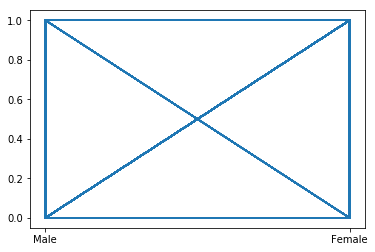

In [26]:
plt.plot(df_copy['sex'] ,df_copy['survived'])

In [27]:
import seaborn as sns

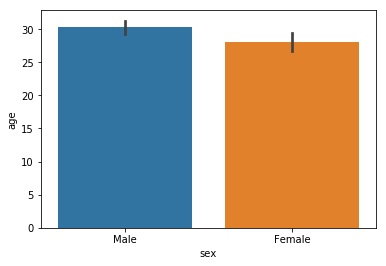

In [31]:
sns.barplot(x='sex' , y='age' ,data=df_copy)